# 3. Separador de pílulas pelo formato

Sabendo que o fundo todo é cinza $(118, 118, 118)$¹, traçaremos linhas a partir do meio de cada lado em direção ao centro, contabilizando assim:
 * O espaçamento em píxels da pílula para com a borda;
 * O tamanho estimado das pílulas (altura, largura).
 
¹ Informações gerais do banco de imagens

In [1]:
import cv2
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

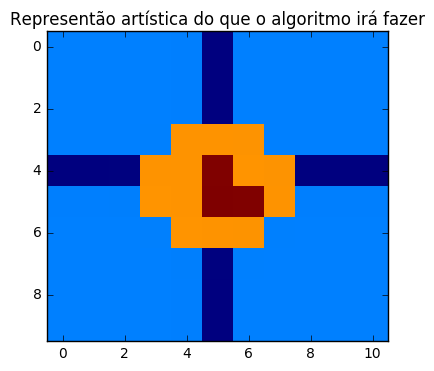

In [2]:
imagem = [
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1],
    [0, 0, 0, 3, 3, 4, 3, 3, 0, 0, 0],
    [1, 1, 1, 3, 3, 4, 4, 3, 1, 1, 1],
    [1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
]

plt.title('Representão artística do que o algoritmo irá fazer')
plt.imshow(imagem, interpolation='None');

## 3.1 Classe identificadora da posição das bordas

In [3]:
class BorderIdentifier:
    """
    Extrai características sobre o tamanho estimado de uma imagem.
    
    Para seu funcionamento, é necessário que:
     - A imagem possua um fundo de mesma cor;
     - O objeto esteja centralizado.
    
    A partir do centro de cada lado da imagem, serão contabilizados quantos pixels
    de distância a imagem está do respectivo lado verificado.
    
    A altura é computada pela diferença da distância do lado superior com o lado inferior.
    O cálculo da largura é realizado de forma similar.
    """
    
    def __init__(self, image):
        self.image = image
        self.height, self.width, _ = image.shape

        self.middle_width = int(self.width/2)
        self.middle_height = int(self.height/2)
        
    def process(self, background_color):
        data = {
            'width': self.width,
            'height': self.height,
            'element': {
                'left': self.left(background_color),
                'right': self.right(background_color),
                'top': self.top(background_color),
                'bottom': self.bottom(background_color),
            }
        }
        
        data['element']['height'] = data['element']['bottom'] - data['element']['top']
        data['element']['width'] = data['element']['right'] - data['element']['left']

        return data

    def left(self, background_color):
        line_width = self.image[self.middle_height]
        return self.count_position(line_width == background_color)

    def right(self, background_color):
        line_width = self.image[self.middle_height]

        return self.width - self.count_position(reversed(line_width == background_color))
    
    def top(self, background_color):
        image = np.transpose(self.image, axes=(1, 0, 2))
        line_height = image[self.middle_width]
        
        return self.count_position(line_height == background_color)

    def bottom(self, background_color):
        image = np.transpose(self.image, axes=(1, 0, 2))
        line_height = image[self.middle_width]
        
        return self.height - self.count_position(reversed(line_height == background_color))

    def count_position(self, iterator):
        i = 0
        
        for pixel in iterator:
            if not pixel.all():
                break
            i += 1
        
        return i


### 3.1.1 Testando classe

Conhecendo previamente o banco de imagems, foi escolhido três casos distintos de pílula para a verificação da classe.

1. Pílula comprida;
2. Pílula redonda;
3. Pílula losangular.

É tirada a razão entre a altura e a largura para ter uma noção de quão redondo é a imagem.

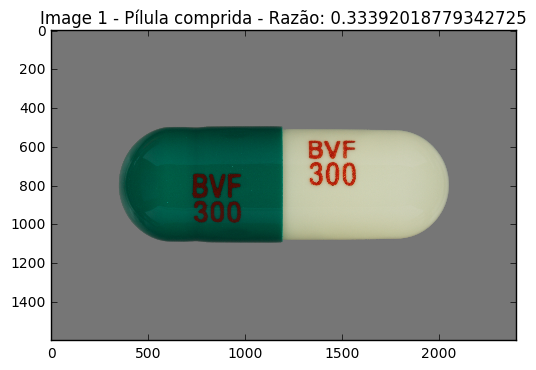

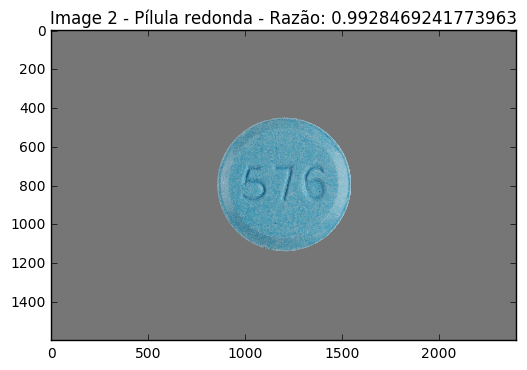

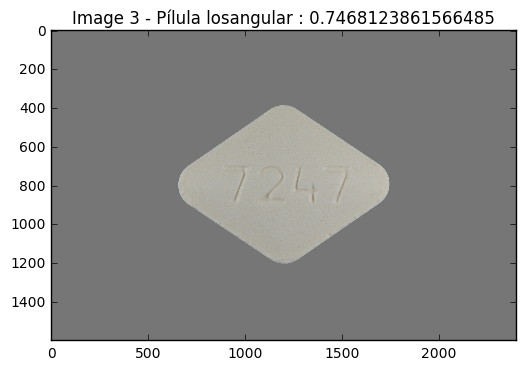

In [4]:
path1 = 'PILL/00093-5119-98_PART_1_OF_1_CHAL10_SF_492D24A9.jpg'
path2 = 'PILL/00093-0576-06_PART_1_OF_1_CHAL10_SB_6026B005.jpg'
path3 = 'PILL/00093-7247-06_PART_1_OF_1_CHAL10_SB_7329B9CD.jpg'

image1 = cv2.imread(path1)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread(path2)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.imread(path3)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

gray = np.array([118, 118, 118])

data1 = BorderIdentifier(image1).process(gray)
data2 = BorderIdentifier(image2).process(gray)
data3 = BorderIdentifier(image3).process(gray)

plt.title('Image 1 - Pílula comprida - Razão: ' + str(data1['element']['height'] / data1['element']['width']))
plt.imshow(image1)
plt.show()

plt.title('Image 2 - Pílula redonda - Razão: ' + str(data2['element']['height'] / data2['element']['width']))
plt.imshow(image2)
plt.show()

plt.title('Image 3 - Pílula losangular : ' + str(data3['element']['height'] / data3['element']['width']))
plt.imshow(image3)
plt.show()

## 3.2 Processamento do banco de imagens

In [5]:
import pandas as pd
import glob

sizes = []

gray = np.array([118, 118, 118])

for path in glob.glob("PILL/*"):
    image = cv2.imread(path)
    
    data = BorderIdentifier(image).process(background_color=gray)
    data['element']['path'] = path
    sizes.append(data['element'])

sizes = pd.DataFrame(sizes)
sizes.head()

,bottom,height,left,path,right,top,width
0,1096,597,340,PILL/00093-4069-01_PART_1_OF_1_CHAL10_SB_E126F...,2059,499,1719
1,1096,595,527,PILL/00093-1063-01_PART_1_OF_1_CHAL10_SB_A029D...,1872,501,1345
2,1097,594,466,PILL/00078-0486-15_PART_1_OF_1_CHAL10_SB_E61D7...,1934,503,1468
3,1151,702,849,PILL/00093-0926-06_PART_1_OF_1_CHAL10_SF_9826C...,1546,449,697
4,1070,540,433,PILL/00093-7227-72_PART_1_OF_1_CHAL10_SF_CC306...,1968,530,1535


In [6]:
sizes['ratio'] = sizes.height/sizes.width

sizes.head()

,bottom,height,left,path,right,top,width,ratio
0,1096,597,340,PILL/00093-4069-01_PART_1_OF_1_CHAL10_SB_E126F...,2059,499,1719,0.347295
1,1096,595,527,PILL/00093-1063-01_PART_1_OF_1_CHAL10_SB_A029D...,1872,501,1345,0.442379
2,1097,594,466,PILL/00078-0486-15_PART_1_OF_1_CHAL10_SB_E61D7...,1934,503,1468,0.404632
3,1151,702,849,PILL/00093-0926-06_PART_1_OF_1_CHAL10_SF_9826C...,1546,449,697,1.007174
4,1070,540,433,PILL/00093-7227-72_PART_1_OF_1_CHAL10_SF_CC306...,1968,530,1535,0.351792


Pela distribuição do gráfico **Razão altura / largura** é possível observar três grupos de pilulas:

 * $razão < 0.7$ - Possivelmente ovais
 * $0.7 < razão < 0.8$ - Possivelmente losangulares
 * $0.8 < razão$ - Possivelmente redondas

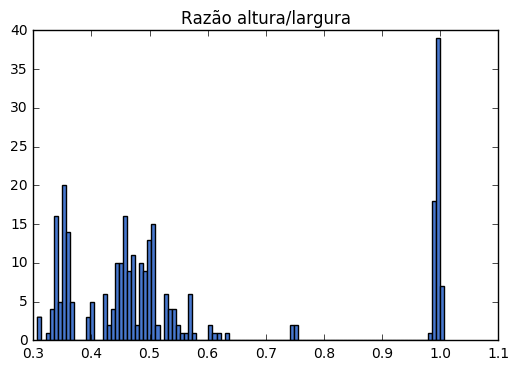

In [7]:
with plt.style.context(('seaborn-muted')):
    plt.title('Razão altura/largura')
    plt.hist(sizes['ratio'], 100)
    plt.show()

## 3.3 Resultados

### 3.3.1 $0.8 < razão$ - Possivelmente redondas

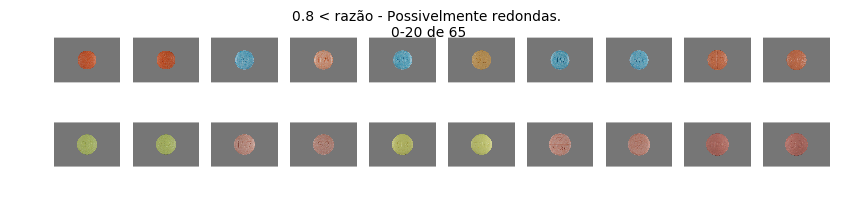

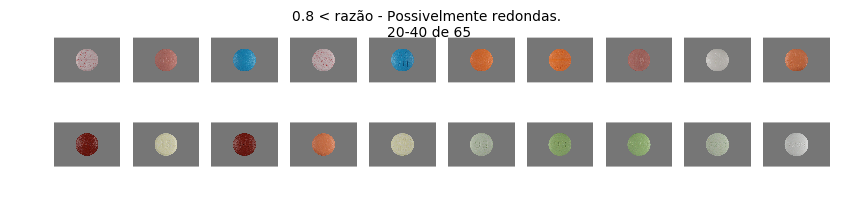

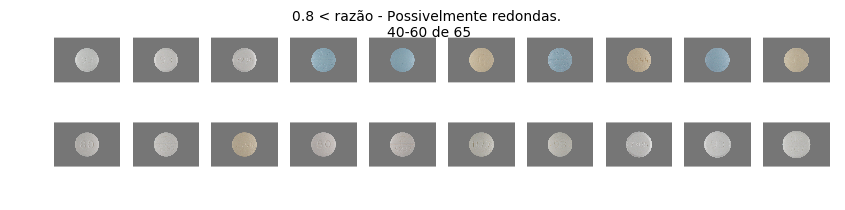

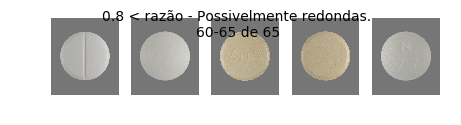

In [8]:
import util.show_images as show_images

pilulas_redondas = sizes[0.9 < sizes.ratio]
pilulas_redondas = pilulas_redondas.sort_values(by='width')

show_images.show(pilulas_redondas['path'], title='0.8 < razão - Possivelmente redondas')

### 3.3.2 $0.7 < razão < 0.8 $ - Possivelmente losangulares

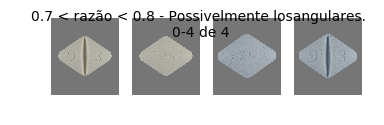

In [9]:
pilulas_losangulares = sizes[(0.7 < sizes.ratio) & (sizes.ratio < 0.8)]
pilulas_losangulares = pilulas_losangulares.sort_values(by='width')

show_images.show(pilulas_losangulares['path'], title='0.7 < razão < 0.8 - Possivelmente losangulares')

### 3.3.3 $razão < 0.7$ - Possivelmente ovais

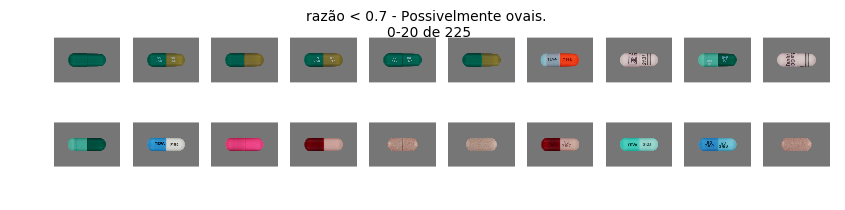

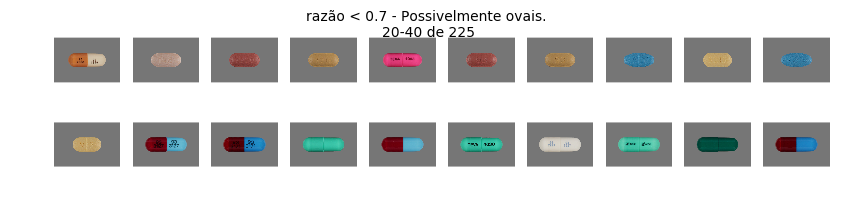

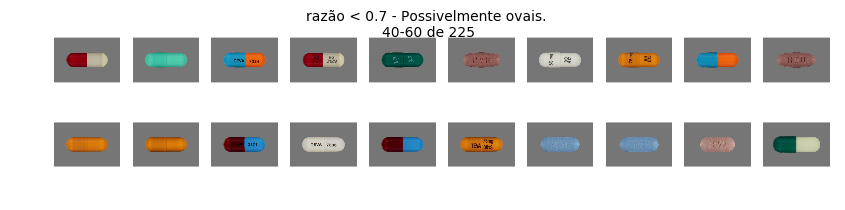

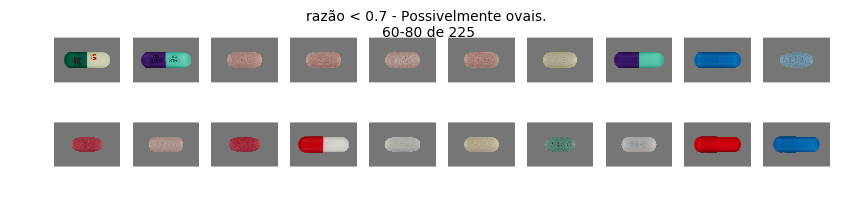

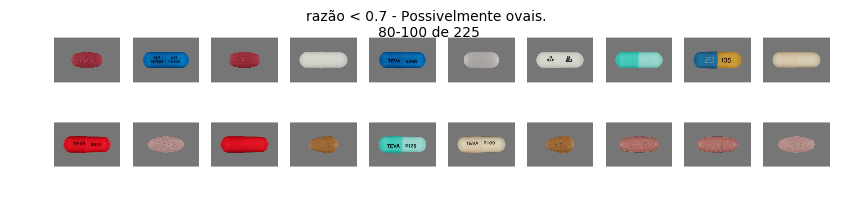

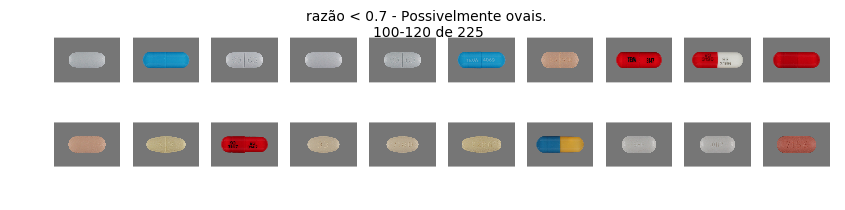

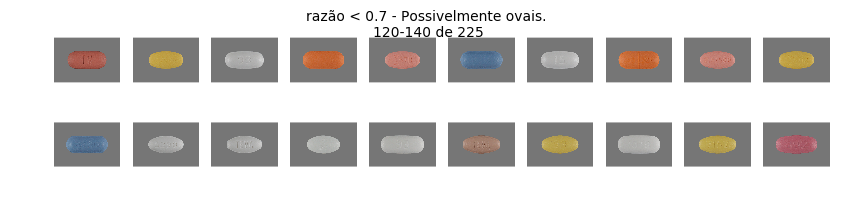

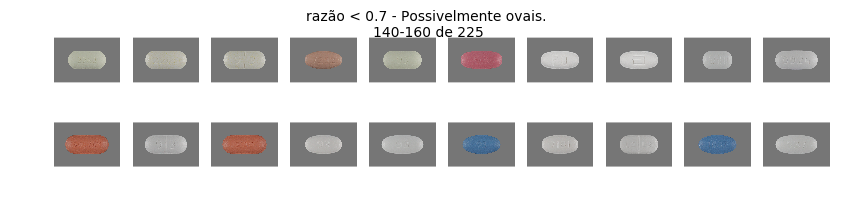

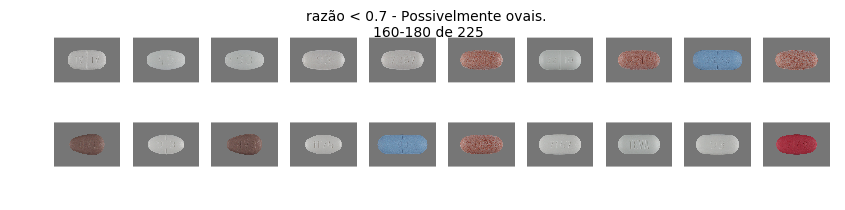

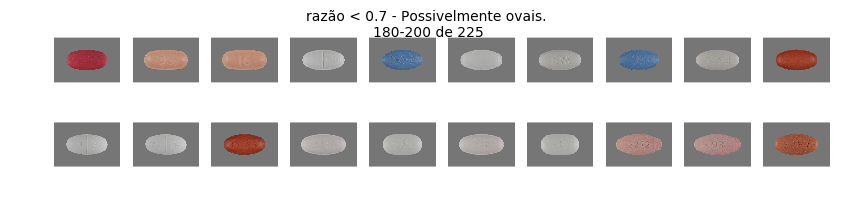

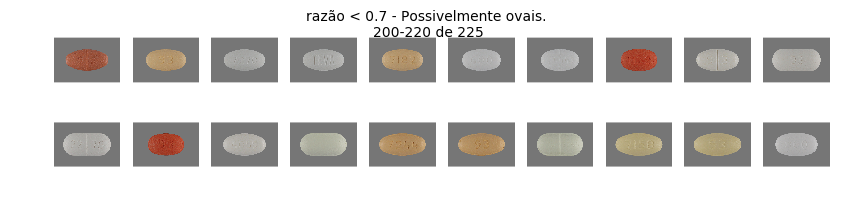

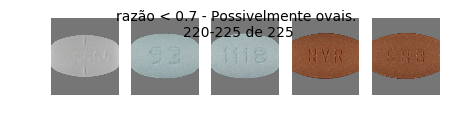

In [10]:
pilulas_ovais = sizes[sizes.ratio < 0.7]
pilulas_ovais = pilulas_ovais.sort_values(by='height')

show_images.show(pilulas_ovais['path'], title='razão < 0.7 - Possivelmente ovais')

## 3.4 Classificador - Árvore de Decisão

A partir da separação que escolhemos, criaremos uma árvore de decisão. Ela será gerada por um _Classificador_  DecisionTreeClassifier. Treinaremos o classificador pela divisão da razão largura/altura escolhida acima.

Mais abaixo será analisada um classificação por outras características

Referência: https://techarena51.com/index.php/getting-started-machine-learning-linux-python-3-scikit-learn/

In [11]:
sizes_learn = sizes.copy()

del sizes_learn['path']

filter_oval = (0.7 < sizes_learn.ratio) & (sizes_learn.ratio < 0.8)
filter_redondo = 0.8 < sizes_learn.ratio

sizes_learn['label'] = 0
sizes_learn.loc[filter_oval, 'label'] = 1
sizes_learn.loc[filter_redondo, 'label'] = 2

sizes_learn['ratio_int'] = sizes_learn['ratio'] * 100
sizes_learn['ratio_int'] = sizes_learn['ratio_int'].apply(lambda x: int(x))
sizes_learn['ratio_int_copy'] = sizes_learn['ratio_int']

sizes_learn[(0.7 < sizes_learn.ratio) & (sizes_learn.ratio < 0.8)].head()

,bottom,height,left,right,top,width,ratio,label,ratio_int,ratio_int_copy
120,1251,904,596,1803,347,1207,0.748964,1,74,74
176,1207,815,654,1750,392,1096,0.743613,1,74,74
195,1207,820,654,1752,387,1098,0.746812,1,74,74
280,1254,905,594,1800,349,1206,0.750415,1,75,75


In [12]:
from sklearn import tree

#features_names = ['bottom', 'height', 'left', 'right', 'top', 'width', 'ratio']
features_names = ['ratio']

features = sizes_learn[features_names]
labels = sizes_learn.label

classifier = tree.DecisionTreeClassifier() 
classifier = classifier.fit(features, labels)

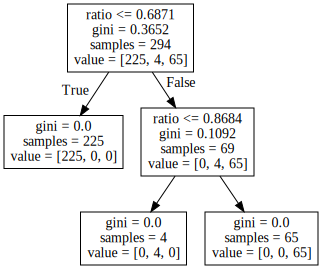

In [13]:
from sklearn.externals.six import StringIO
import graphviz

dot_data = StringIO()

tree.export_graphviz(classifier, feature_names=features_names, out_file=dot_data)
graphviz.Source(dot_data.getvalue())

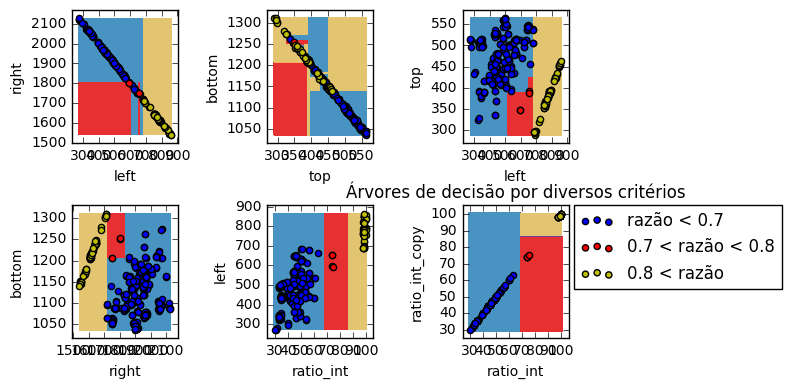

In [14]:
# Parameters
features_namess = [
    ['left', 'right'],
    ['top', 'bottom'],
    ['left', 'top'],
    ['right', 'bottom'],
    ['ratio_int', 'left'],
    ['ratio_int', 'ratio_int_copy'],
]

for i, features_names in zip(range(1, 7), features_namess):
    features = sizes_learn[features_names]
    labels = sizes_learn.label

    legend = ['razão < 0.7', '0.7 < razão < 0.8', '0.8 < razão']
    n_classes = 3
    plot_colors = "bry"
    plot_step = 0.2

    X, y = features, labels

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    plt.subplot(2, 3, i)
    plt.tight_layout()
    
    x_min, x_max = X[features_names[0]].min() - 1, X[features_names[0]].max() + 1
    y_min, y_max = X[features_names[1]].min() - 1, X[features_names[1]].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step),
        np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(features_names[0])
    plt.ylabel(features_names[1])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        scatter_x = X[features_names[0]].where(y == i)
        scatter_y = X[features_names[1]].where(y == i)
        plt.scatter(scatter_x, scatter_y, c=color, marker='o', label=legend[i], cmap=plt.cm.Paired)

    plt.axis("tight")

plt.title('Árvores de decisão por diversos critérios')
plt.rcParams["figure.figsize"] = [8, 6]
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()